In [6]:
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
import torch

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
# Render the figure in a notebook:
%matplotlib inline  

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

from sklearn import metrics

import torch
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import torch.nn.functional as F

from torchmetrics.classification import Accuracy
from torchmetrics.classification import Recall
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from torchmetrics import R2Score
from torchmetrics import MeanAbsoluteError

from sklearn.preprocessing import StandardScaler

In [7]:
x_train = pd.read_csv('../no_nontoxic_nans_X_train.csv',index_col=0)
y_train = pd.read_csv('../no_nontoxic_nans_y_train.csv',index_col=0)

x_val = pd.read_csv('../no_nontoxic_nans_x_val.csv',index_col=0)
y_val = pd.read_csv('../no_nontoxic_nans_y_val.csv',index_col=0)

x_test = pd.read_csv('../no_nontoxic_nans_x_test.csv',index_col=0)
y_test = pd.read_csv('../no_nontoxic_nans_y_test.csv',index_col=0)

In [8]:
#Remove all nan values from the df
mask = x_train.notna().all(axis=1)

x_train_clean = x_train[mask]
y_train_clean = y_train[mask]

mask2 = x_test.notna().all(axis=1)

x_test_clean = x_test[mask2]
y_test_clean = y_test[mask2]

mask3 = x_val.notna().all(axis=1)

x_val_clean = x_val[mask3]
y_val_clean = y_val[mask3]

In [9]:
x_train_clean

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
2839,0.782289,0.782289,-0.411931,-1.857366,1.843832,-0.411132,0.400898,0.424862,0.401366,0.291094,...,-0.169952,4.653842,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
4142,0.514501,0.514501,-0.715461,-1.909347,-1.359559,-0.482330,-0.338816,-0.309899,-0.338046,-0.370589,...,-0.169952,4.653842,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
5263,-1.568886,-1.568886,0.618588,0.916639,-0.710625,1.699000,-1.267817,-1.280074,-1.267031,-1.171574,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
4453,0.016489,0.016489,0.109409,0.224363,-0.535860,-0.796046,-1.182859,-1.183096,-1.182011,-1.101923,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
818,-2.045829,-2.045829,1.736784,1.252288,-0.178133,-0.615826,-0.236252,-0.201247,-0.247352,-0.927796,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,0.649924,-0.156191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,0.887262,0.887262,-0.716065,-0.019715,-0.425516,-0.095191,0.366893,0.465607,0.368263,0.325919,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
3982,0.290944,0.290944,-0.586069,-1.808203,0.188066,-0.434999,-0.613582,-0.587013,-0.612969,-0.649193,...,-0.169952,4.653842,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
2812,0.256310,0.256310,-0.564504,0.203385,-0.957192,0.922348,-0.901688,-0.892217,-0.900724,-0.823320,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191
3836,0.232985,0.232985,-0.118659,0.168489,0.667181,-0.001743,0.826162,0.798595,0.827530,0.952777,...,-0.169952,-0.168779,-0.075985,-0.07924,-0.052157,-0.116072,-0.044741,-0.090712,-0.269700,-0.156191


In [10]:
### You have been using DataFrames because these are easy to deal with but here we need the data as an array

x_train_array = x_train_clean.to_numpy()
x_train_tensor = torch.Tensor(x_train_array)

### Now some properties will be printed so you can see how this is similar to a NumPy array

print(f'X_train_tensor = {x_train_tensor}')

print(f'Size of X_train_tensor = {x_train_tensor.size()}') 

print(f'Data type of X_train_tensor = {x_train_tensor.dtype}')

X_train_tensor = tensor([[ 0.7823,  0.7823, -0.4119,  ..., -0.0907, -0.2697, -0.1562],
        [ 0.5145,  0.5145, -0.7155,  ..., -0.0907, -0.2697, -0.1562],
        [-1.5689, -1.5689,  0.6186,  ..., -0.0907, -0.2697, -0.1562],
        ...,
        [ 0.2563,  0.2563, -0.5645,  ..., -0.0907, -0.2697, -0.1562],
        [ 0.2330,  0.2330, -0.1187,  ..., -0.0907, -0.2697, -0.1562],
        [ 0.7342,  0.7342, -0.7105,  ..., -0.0907, -0.2697, -0.1562]])
Size of X_train_tensor = torch.Size([3607, 217])
Data type of X_train_tensor = torch.float32


In [11]:
x_val_array = x_val_clean.to_numpy()
x_val_tensor = torch.Tensor(x_val_array)

y_train_array = y_train_clean['toxic'].to_numpy()
y_train_tensor = torch.Tensor(y_train_array)


y_val_array = y_val_clean['toxic'].to_numpy()
y_val_tensor = torch.Tensor(y_val_array)

In [12]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

In [13]:
#set up class for deep NN with an input layer, 2 hidden layers with progressively less outputs and 1 output layer.
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(217, 108)        
        self.fc2 = nn.Linear(108, 54)
        self.fc3 = nn.Linear(54, 2)
           
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # For the final layer we use raw logits for the cross entropy loss
        return x

In [14]:
torch.manual_seed(0)
network = DNN()
network.train()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)

num_epochs = int(10)  

for epoch in range(1,num_epochs+1):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        optimizer.zero_grad() 
        outputs = network(inputs)
        loss = criterion(outputs, labels.long()) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
        
    avg_train_loss = running_loss / len(trainloader) 

    print('Epoch',epoch,'Loss =',avg_train_loss) 

Epoch 1 Loss = 0.6294520517875408
Epoch 2 Loss = 0.5467411331061659
Epoch 3 Loss = 0.5065241003858632
Epoch 4 Loss = 0.48786027164294804
Epoch 5 Loss = 0.468854670894557
Epoch 6 Loss = 0.4612419409998532
Epoch 7 Loss = 0.45086766214206303
Epoch 8 Loss = 0.4363125829861082
Epoch 9 Loss = 0.4305419572468462
Epoch 10 Loss = 0.4270513931225086


In [21]:
def optimise_learning_rate(net_param, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    avg_train_loss_list =[]
    param_bacc_train_list = []
    param_bacc_val_list = []

    learning_rate = np.linspace(0.1,1,10, dtype=float)

    for i in learning_rate:
        net_param.train()
        criterion_param = nn.CrossEntropyLoss()
        optimizer_param = torch.optim.SGD(net_param.parameters(), lr=i)

        num_epochs = 10  
        
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data 
            optimizer_param.zero_grad() 
            outputs = net_param(inputs) 
            loss = criterion_param(outputs, labels.long()) 
            loss.backward() 
            optimizer_param.step() 
            running_loss += loss.item() 
            
        avg_train_loss = running_loss / len(trainloader) 
        avg_train_loss_list.append(avg_train_loss)

        net_param.eval()  # sets layers to evaluation mode
        with torch.no_grad():  # stops gradient tracking
            y_train_logits = net_param(x_train_tensor).detach() 
            y_train_pred = torch.argmax(y_train_logits, dim=1) 
        macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

        NN_param_train_bacc = macro_recall(y_train_pred, y_train_tensor)
        #print('Balanced Accuracy train:',float(NN_param_train_bacc))
        param_bacc_train_list.append(NN_param_train_bacc)

        with torch.no_grad(): 
            y_val_logits = net_param(x_val_tensor).detach() 
            y_val_pred = torch.argmax(y_val_logits, dim=1) # If the first index is larger it will return 0 and if the second is 1 
        NN_param_val_bacc = macro_recall(y_val_pred, y_val_tensor)
        #print('Balanced Accuracy val:',float(NN_param_val_bacc))
        param_bacc_val_list.append(NN_param_val_bacc)

    plt.plot(learning_rate, avg_train_loss_list, '-o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Average Loss Training')
    plt.show();

    plt.plot(learning_rate, param_bacc_train_list, '-o', label = 'Train')
    plt.plot(learning_rate, param_bacc_val_list, '-o', label = 'Validation', color='skyblue')
    plt.xlabel('Learning Rate')
    plt.ylabel('Balanced Accuracy')
    plt.legend()
    plt.show();




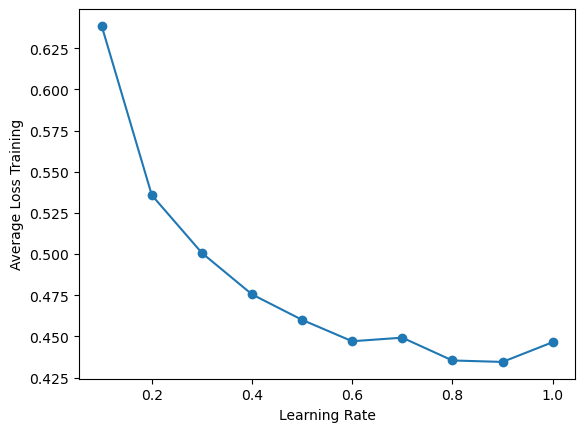

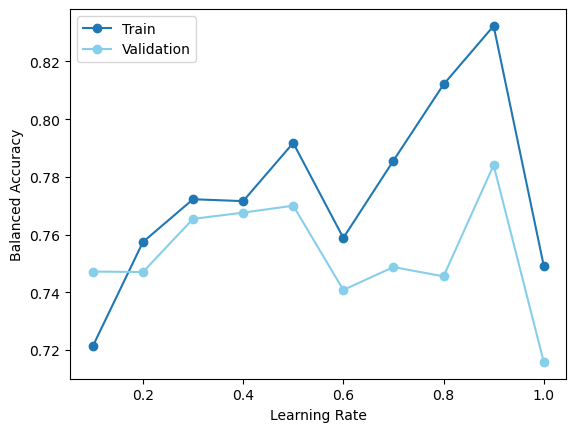

In [22]:
net_param = DNN()
optimise_learning_rate(net_param, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)


SET LEARNING RATE TO 0.9

In [32]:
def optimise_epochs(net_param, learning_rate, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    
    epoch_list = []
    avg_train_loss_list =[]
    param_bacc_train_list = []
    param_bacc_val_list = []

    max_epochs = 200
 
    net_param.train()
    criterion_param = nn.CrossEntropyLoss()
    optimizer_param = torch.optim.SGD(net_param.parameters(), lr=learning_rate) 

    for epoch in range(1,max_epochs+1):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data 
            optimizer_param.zero_grad() 
            outputs = net_param(inputs) 
            loss = criterion_param(outputs, labels.long()) 
            loss.backward() 
            optimizer_param.step() 
            running_loss += loss.item() 
            
        avg_train_loss = running_loss / len(trainloader) 
        avg_train_loss_list.append(avg_train_loss)
        epoch_list.append(epoch)

        net_param.eval()  # sets layers to evaluation mode
        with torch.no_grad():  # stops gradient tracking
            y_train_logits = net_param(x_train_tensor).detach() 
            y_train_pred = torch.argmax(y_train_logits, dim=1) 
        macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

        NN_param_train_bacc = macro_recall(y_train_pred, y_train_tensor)
        #print('Balanced Accuracy train:',float(NN_param_train_bacc))
        param_bacc_train_list.append(NN_param_train_bacc)

        with torch.no_grad(): 
            y_val_logits = net_param(x_val_tensor).detach() 
            y_val_pred = torch.argmax(y_val_logits, dim=1) # If the first index is larger it will return 0 and if the second is 1 
        NN_param_val_bacc = macro_recall(y_val_pred, y_val_tensor)
        #print('Balanced Accuracy val:',float(NN_param_val_bacc))
        param_bacc_val_list.append(NN_param_val_bacc)

    plt.plot(epoch_list, avg_train_loss_list, '-o')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss Training')
    plt.show();

    plt.plot(epoch_list, param_bacc_train_list, '-o', label = 'Train')
    plt.plot(epoch_list, param_bacc_val_list, '-o', label = 'Validation', color='skyblue')
    plt.xlabel('Epoch')
    plt.ylabel('Balanced Accuracy')
    plt.legend()
    plt.show();

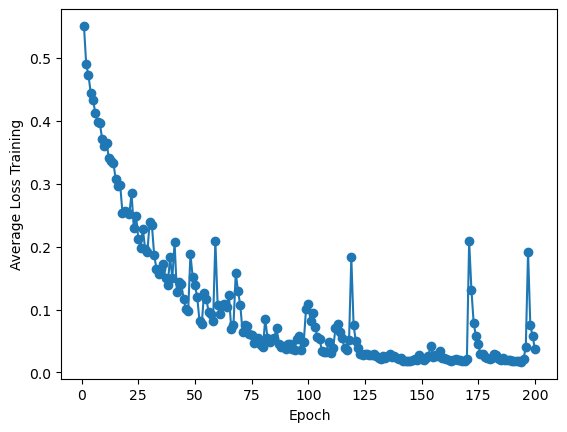

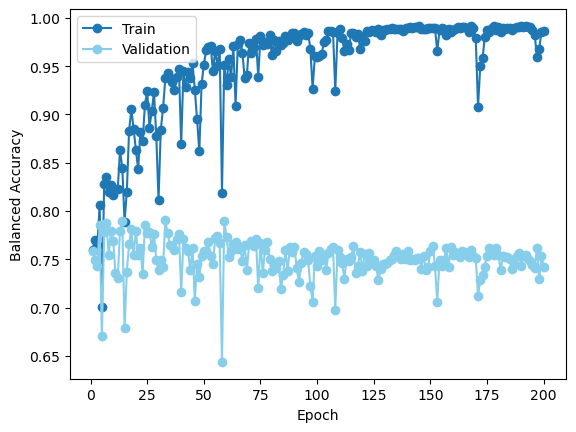

In [33]:
net_epoch_param = DNN()
optimise_epochs(net_epoch_param, 0.9, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

SET EPOCH TO 75

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [41]:
#test the SGD model with optimised params
def test_SGD(network, learning_rate, best_epochs, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    network.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)

    num_epochs = best_epochs  

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        optimizer.zero_grad() 
        outputs = network(inputs)
        loss = criterion(outputs, labels.long()) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
            
    avg_train_loss = running_loss / len(trainloader) 

    network.eval()
    with torch.no_grad():  # stops gradient tracking
        y_train_logits = network(x_train_tensor).detach() 
        y_train_pred = torch.argmax(y_train_logits, dim=1) 

        y_val_logits = network(x_val_tensor).detach() 
        y_val_pred = torch.argmax(y_val_logits, dim=1) 

    ConfusionMatrixDisplay.from_predictions(y_train_tensor, y_train_pred)
    ConfusionMatrixDisplay.from_predictions(y_val_tensor, y_val_pred)

    macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

    network_train_bacc = macro_recall(y_train_pred, y_train_tensor)
    print('Balanced Accuracy train:',float(network_train_bacc))

    network_val_bacc = macro_recall(y_val_pred, y_val_tensor)
    print('Balanced Accuracy Validation:',float(network_val_bacc))


Balanced Accuracy train: 0.5275869965553284
Balanced Accuracy Validation: 0.5335385799407959


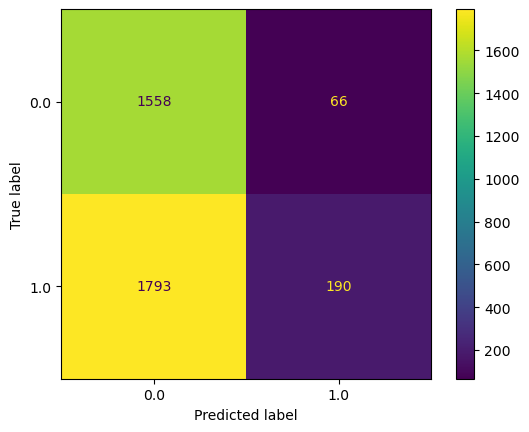

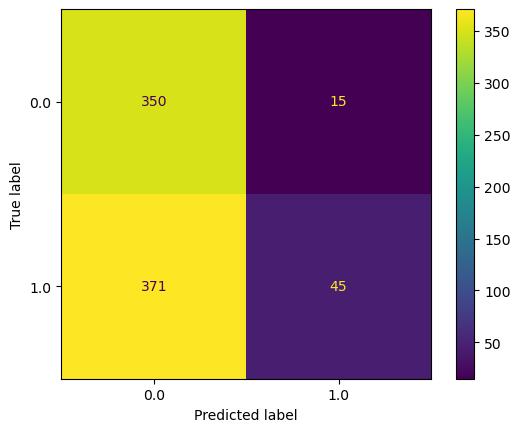

In [54]:
net_SGD_optimised = DNN()
test_SGD(net_SGD_optimised, 0.9, 75, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)


In [47]:
#test the Adam model with optimised params
def test_Adam(network, learning_rate, best_epochs, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor):
    network.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(network.parameters(), lr=learning_rate)

    num_epochs = best_epochs  

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data 
        optimizer.zero_grad() 
        outputs = network(inputs)
        loss = criterion(outputs, labels.long()) 
        loss.backward() 
        optimizer.step() 
        running_loss += loss.item() 
            
    avg_train_loss = running_loss / len(trainloader) 

    network.eval()
    with torch.no_grad():  # stops gradient tracking
        y_train_logits = network(x_train_tensor).detach() 
        y_train_pred = torch.argmax(y_train_logits, dim=1) 

        y_val_logits = network(x_val_tensor).detach() 
        y_val_pred = torch.argmax(y_val_logits, dim=1) 

    ConfusionMatrixDisplay.from_predictions(y_train_tensor, y_train_pred)
    ConfusionMatrixDisplay.from_predictions(y_val_tensor, y_val_pred)

    macro_recall = Recall(task='multiclass', num_classes=2, average='macro')

    network_train_bacc = macro_recall(y_train_pred, y_train_tensor)
    print('Balanced Accuracy train:',float(network_train_bacc))

    network_val_bacc = macro_recall(y_val_pred, y_val_tensor)
    print('Balanced Accuracy Validation:',float(network_val_bacc))

Balanced Accuracy train: 0.5002521276473999
Balanced Accuracy Validation: 0.5


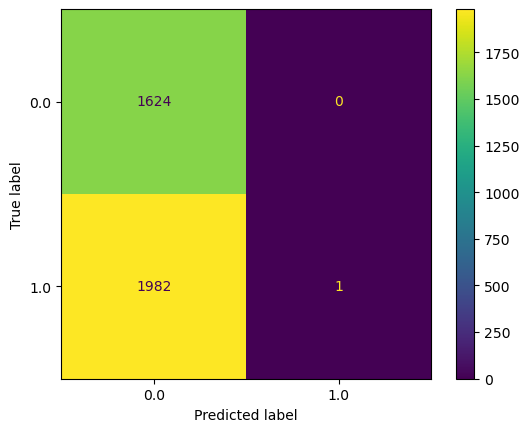

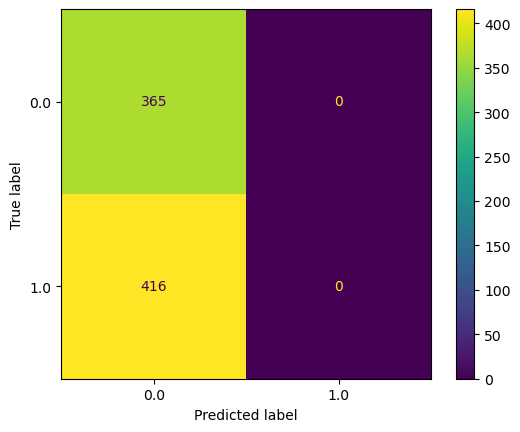

In [55]:
net_Adam_optimised = DNN()
test_Adam(net_Adam_optimised , 0.9, 75, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

# Conclusion: For the 2 Hidden layer model, best model is the optimised SD model

Now increase the number hidden layers to 3

In [51]:
#set up class for deep NN with an input layer, 3 hidden layers with progressively less outputs and 1 output layer.
class DNN_3_layer(nn.Module):
    def __init__(self):
        super(DNN_3_layer, self).__init__()
        self.fc1 = nn.Linear(217, 108)        
        self.fc2 = nn.Linear(108, 54)
        self.fc3 = nn.Linear(54, 27)
        self.fc4 = nn.Linear(27,2)
           
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # For the final layer we use raw logits for the cross entropy loss
        return x

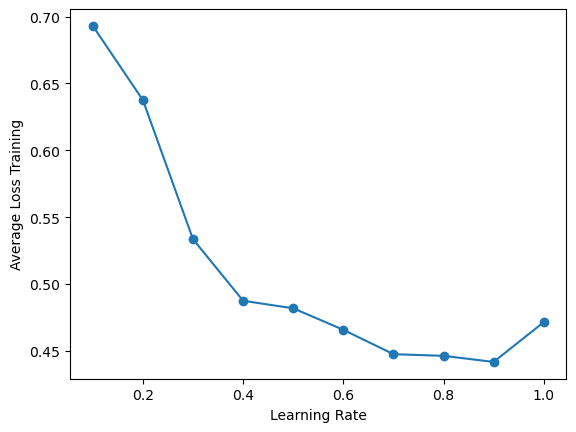

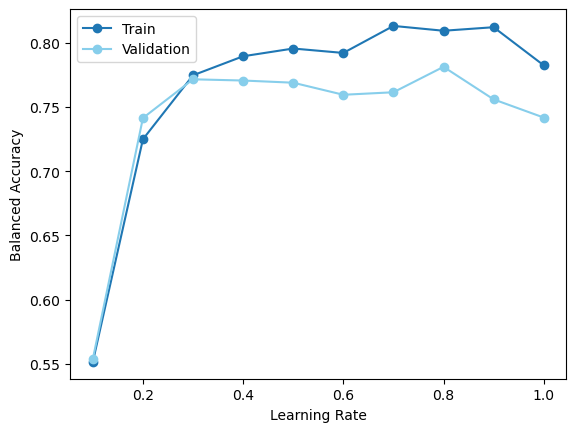

In [52]:
net_2_param = DNN_3_layer()
optimise_learning_rate(net_2_param, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

Again optimum learning rate is 0.9

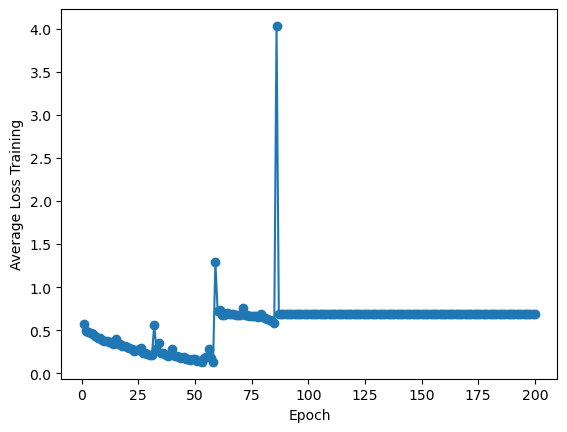

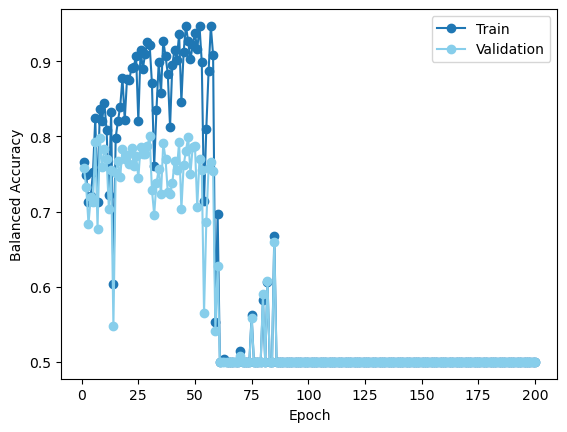

In [53]:
net_2_epoch_param = DNN_3_layer()
optimise_epochs(net_2_epoch_param, 0.9, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

Best number of epochs is 50

Balanced Accuracy train: 0.6605722308158875
Balanced Accuracy Validation: 0.6728365421295166


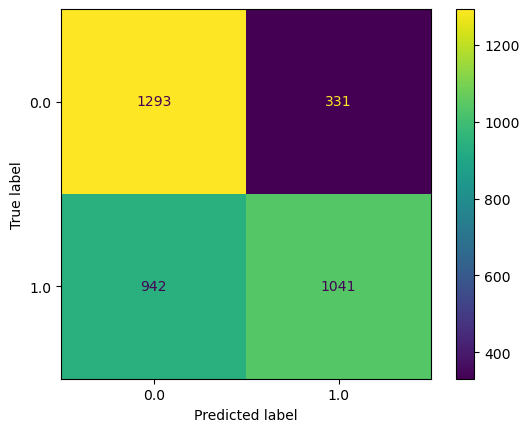

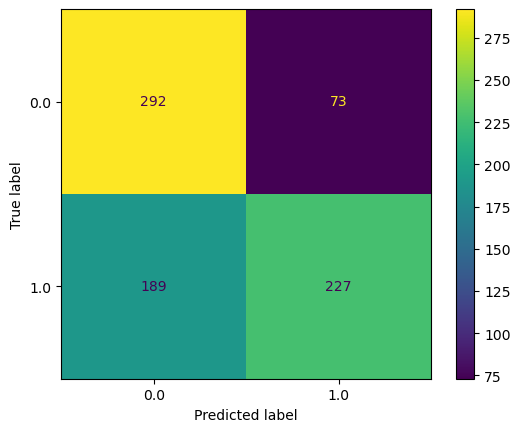

In [56]:
net_2_SGD_optimised = DNN_3_layer()
test_SGD(net_2_SGD_optimised, 0.9, 75, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)


Balanced Accuracy train: 0.49932852387428284
Balanced Accuracy Validation: 0.5


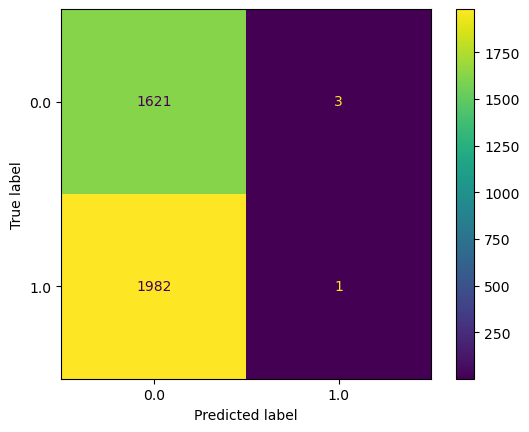

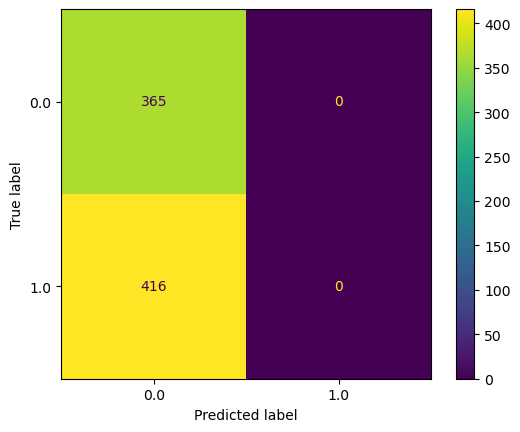

In [58]:
net_Adam_optimised = DNN_3_layer()
test_Adam(net_Adam_optimised , 0.9, 75, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

# For 4 Hidden Layers

In [60]:
#set up class for deep NN with an input layer, 4 hidden layers with progressively less outputs and 1 output layer.
class DNN_4_layer(nn.Module):
    def __init__(self):
        super(DNN_4_layer, self).__init__()
        self.fc1 = nn.Linear(217, 108)        
        self.fc2 = nn.Linear(108, 54)
        self.fc3 = nn.Linear(54, 27)
        self.fc4 = nn.Linear(27,14)
        self.fc5 = nn.Linear(14,2)
           
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x) # For the final layer we use raw logits for the cross entropy loss
        return x

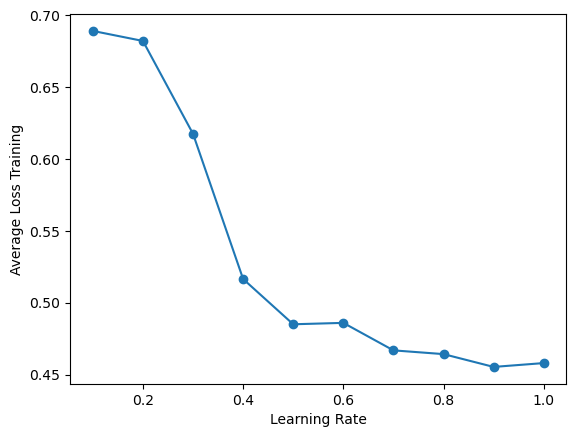

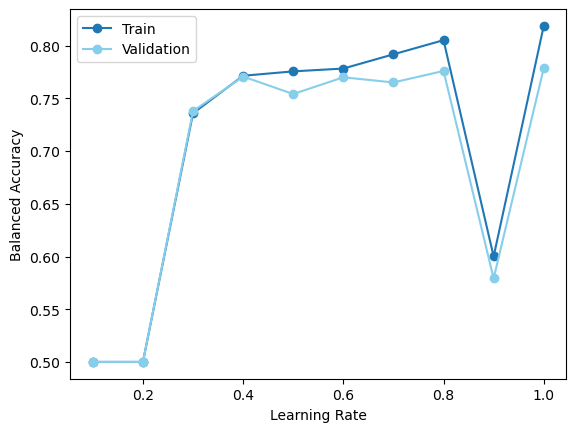

In [61]:
net_3_param = DNN_4_layer()
optimise_learning_rate(net_3_param, trainloader, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor)

Best learning rate is 0.8